# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

How to improve the SAT participation rate based on the
data provided on SAT/ACT score 2017/2018.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

In [1]:
#Imports:
import pandas as pd
from IPython.display import HTML

import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [2]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv') 
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [3]:
sat_2018 = pd.read_csv('../data/sat_2018.csv') 
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [4]:
act_2018 = pd.read_csv('../data/act_2018_updated.csv') 
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [5]:
act_2017 = pd.read_csv('../data/act_2017.csv') 
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [6]:
sat_2017.shape

(51, 5)

In [7]:
sat_2018.shape

(51, 5)

In [8]:
act_2017.shape

(52, 7)

In [9]:
act_2018.shape

(51, 7)

sat_2017.info

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [10]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [11]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [12]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [13]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


Answer : The files provides the scores for SAT & ACT exams for 2017/2018 with Total mean score for each states 
    which breakdowns into indivual subject mean score

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [14]:
act_2017.columns = ['State', 'act_PP_2017','act_English_2017','act_Math_2017','act_Reading_2017','act_Science_2017','act_Composite_2017']

In [15]:
act_2018.columns = ['State', 'act_PP_2018','act_English_2018','act_Math_2018','act_Reading_2018','act_Science_2018','act_Composite_2018']

In [16]:
sat_2017.columns =['State','sat_PP_2017','sat_EBRW_2017','sat_Math_2017','sat_Total_2017']

In [17]:
sat_2018.columns =['State','sat_PP_2018','sat_EBRW_2018','sat_Math_2018','sat_Total_2018']

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [18]:
sat_list=[sat_2017,sat_2018]

In [19]:
act_list=[act_2017,act_2018]

In [20]:
act =pd.concat(act_list)

/Users/sathya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [21]:
act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 50
Data columns (total 13 columns):
State                 103 non-null object
act_Composite_2017    52 non-null object
act_Composite_2018    51 non-null float64
act_English_2017      52 non-null float64
act_English_2018      51 non-null float64
act_Math_2017         52 non-null float64
act_Math_2018         51 non-null float64
act_PP_2017           52 non-null object
act_PP_2018           51 non-null float64
act_Reading_2017      52 non-null float64
act_Reading_2018      51 non-null float64
act_Science_2017      52 non-null float64
act_Science_2018      51 non-null float64
dtypes: float64(10), object(3)
memory usage: 11.3+ KB


In [22]:
score_2017 = pd.merge(act_2017, sat_2017, on =['State'])
score_2017.head()

,State,act_PP_2017,act_English_2017,act_Math_2017,act_Reading_2017,act_Science_2017,act_Composite_2017,sat_PP_2017,sat_EBRW_2017,sat_Math_2017,sat_Total_2017
0,Alabama,100%,18.9,18.4,19.7,19.4,19.2,5%,593,572,1165
1,Alaska,65%,18.7,19.8,20.4,19.9,19.8,38%,547,533,1080
2,Arizona,62%,18.6,19.8,20.1,19.8,19.7,30%,563,553,1116
3,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,3%,614,594,1208
4,California,31%,22.5,22.7,23.1,22.2,22.8,53%,531,524,1055


In [23]:
score_2018 = pd.merge(act_2018, sat_2018, on =['State'])
score_2018.head()

,State,act_PP_2018,act_English_2018,act_Math_2018,act_Reading_2018,act_Science_2018,act_Composite_2018,sat_PP_2018,sat_EBRW_2018,sat_Math_2018,sat_Total_2018
0,Alabama,100,19.1,18.9,18.3,19.6,19.0,6%,595,571,1166
1,Alaska,33,20.8,19.8,20.6,21.6,20.7,43%,562,544,1106
2,Arizona,66,19.2,18.2,19.4,19.5,19.2,29%,577,572,1149
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4,5%,592,576,1169
4,California,27,22.7,22.5,22.5,23.0,22.1,60%,540,536,1076


In [24]:
score = pd.merge(score_2017, score_2018, on =['State'])
score.head()

,State,act_PP_2017,act_English_2017,act_Math_2017,act_Reading_2017,act_Science_2017,act_Composite_2017,sat_PP_2017,sat_EBRW_2017,sat_Math_2017,...,act_PP_2018,act_English_2018,act_Math_2018,act_Reading_2018,act_Science_2018,act_Composite_2018,sat_PP_2018,sat_EBRW_2018,sat_Math_2018,sat_Total_2018
0,Alabama,100%,18.9,18.4,19.7,19.4,19.2,5%,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6%,595,571,1166
1,Alaska,65%,18.7,19.8,20.4,19.9,19.8,38%,547,533,...,33,20.8,19.8,20.6,21.6,20.7,43%,562,544,1106
2,Arizona,62%,18.6,19.8,20.1,19.8,19.7,30%,563,553,...,66,19.2,18.2,19.4,19.5,19.2,29%,577,572,1149
3,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,3%,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5%,592,576,1169
4,California,31%,22.5,22.7,23.1,22.2,22.8,53%,531,524,...,27,22.7,22.5,22.5,23.0,22.1,60%,540,536,1076


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


In [25]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
State                 51 non-null object
act_PP_2017           51 non-null object
act_English_2017      51 non-null float64
act_Math_2017         51 non-null float64
act_Reading_2017      51 non-null float64
act_Science_2017      51 non-null float64
act_Composite_2017    51 non-null object
sat_PP_2017           51 non-null object
sat_EBRW_2017         51 non-null int64
sat_Math_2017         51 non-null int64
sat_Total_2017        51 non-null int64
act_PP_2018           51 non-null int64
act_English_2018      51 non-null float64
act_Math_2018         51 non-null float64
act_Reading_2018      51 non-null float64
act_Science_2018      51 non-null float64
act_Composite_2018    51 non-null float64
sat_PP_2018           51 non-null object
sat_EBRW_2018         51 non-null int64
sat_Math_2018         51 non-null int64
sat_Total_2018        51 non-null int64
dtypes: float64(9), int64(7), obje

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

Changing the data type from string to float

In [26]:
score["act_Composite_2017"]= score["act_Composite_2017"].str.replace("20.2x", "20.2", case = False)

In [27]:
score['act_Composite_2017'] = score['act_Composite_2017'].astype('float64')

In [28]:
score['act_PP_2017'].dtype

dtype('O')

In [29]:
if  score['act_PP_2017'].dtype == 'str':
    score['act_PP_2017']=score['act_PP_2017'].str.replace('%', '').astype('float64')

In [30]:
score['sat_PP_2017']=score['sat_PP_2017'].str.replace('%', '').astype('float64')

In [31]:
score['sat_PP_2018']=score['sat_PP_2018'].str.replace('%', '').astype('float64')

#### 5. What are your data types? 
Display the data types of each feature. 

In [32]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
State                 51 non-null object
act_PP_2017           51 non-null object
act_English_2017      51 non-null float64
act_Math_2017         51 non-null float64
act_Reading_2017      51 non-null float64
act_Science_2017      51 non-null float64
act_Composite_2017    51 non-null float64
sat_PP_2017           51 non-null float64
sat_EBRW_2017         51 non-null int64
sat_Math_2017         51 non-null int64
sat_Total_2017        51 non-null int64
act_PP_2018           51 non-null int64
act_English_2018      51 non-null float64
act_Math_2018         51 non-null float64
act_Reading_2018      51 non-null float64
act_Science_2018      51 non-null float64
act_Composite_2018    51 non-null float64
sat_PP_2018           51 non-null float64
sat_EBRW_2018         51 non-null int64
sat_Math_2018         51 non-null int64
sat_Total_2018        51 non-null int64
dtypes: float64(12), int64(7), 

In [33]:
sc=score.loc[:,['State','act_PP_2017','act_Composite_2017','act_PP_2018','act_Composite_2018','sat_PP_2017',
                'sat_Total_2017','sat_PP_2018',
                'sat_Total_2018']]

In [34]:
sc.rename(columns={"act_Composite_2017": "act_Composite_2017"},inplace=True)
print()

In [35]:
score['act_PP_2017']=score['act_PP_2017'].replace('%','',regex=True).astype('float')

In [36]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
State                 51 non-null object
act_PP_2017           51 non-null float64
act_English_2017      51 non-null float64
act_Math_2017         51 non-null float64
act_Reading_2017      51 non-null float64
act_Science_2017      51 non-null float64
act_Composite_2017    51 non-null float64
sat_PP_2017           51 non-null float64
sat_EBRW_2017         51 non-null int64
sat_Math_2017         51 non-null int64
sat_Total_2017        51 non-null int64
act_PP_2018           51 non-null int64
act_English_2018      51 non-null float64
act_Math_2018         51 non-null float64
act_Reading_2018      51 non-null float64
act_Science_2018      51 non-null float64
act_Composite_2018    51 non-null float64
sat_PP_2018           51 non-null float64
sat_EBRW_2018         51 non-null int64
sat_Math_2018         51 non-null int64
sat_Total_2018        51 non-null int64
dtypes: float64(13), int64(7),

In [37]:
sc.tail()

,State,act_PP_2017,act_Composite_2017,act_PP_2018,act_Composite_2018,sat_PP_2017,sat_Total_2017,sat_PP_2018,sat_Total_2018
46,Virginia,29%,23.8,24,23.5,65.0,1102,68.0,1117
47,Washington,29%,21.9,24,22.0,64.0,1075,69.0,1081
48,West Virginia,69%,20.4,65,20.4,14.0,1086,28.0,999
49,Wisconsin,100%,20.5,100,20.8,3.0,1291,3.0,1294
50,Wyoming,100%,20.2,100,20.3,3.0,1230,3.0,1257


#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

I Changed the data type after merging the data set.

- Fix any individual values preventing other columns from being the appropriate type.

In [38]:
sc['act_PP_2017']=sc['act_PP_2017'].replace('%','',regex=True).astype('float')
sc['act_PP_2018']=sc['act_PP_2018'].replace('%','',regex=True).astype('float')

sc.tail()
#lambda x: for x sc['act_PP_2017'].replace('$','')
#sc.plot(kind='scatter', x='act_PP_2017', y='act_PP_2018');

,State,act_PP_2017,act_Composite_2017,act_PP_2018,act_Composite_2018,sat_PP_2017,sat_Total_2017,sat_PP_2018,sat_Total_2018
46,Virginia,29.0,23.8,24.0,23.5,65.0,1102,68.0,1117
47,Washington,29.0,21.9,24.0,22.0,64.0,1075,69.0,1081
48,West Virginia,69.0,20.4,65.0,20.4,14.0,1086,28.0,999
49,Wisconsin,100.0,20.5,100.0,20.8,3.0,1291,3.0,1294
50,Wyoming,100.0,20.2,100.0,20.3,3.0,1230,3.0,1257


In [39]:
sc['sat_PP_2017']=sc['sat_PP_2017'].replace('%','',regex=True).astype('float')
sc['sat_PP_2018']=sc['sat_PP_2018'].replace('%','',regex=True).astype('float')



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [40]:
export_csv = score_2017.to_csv('../data/score_2017.csv',index=False)
export_csv = score_2018.to_csv('../data/score_2018.csv',index=False)
print()

#### 4a. Does the data look complete? 

Answer: Yes.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: No

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [41]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 9 columns):
State                 51 non-null object
act_PP_2017           51 non-null float64
act_Composite_2017    51 non-null float64
act_PP_2018           51 non-null float64
act_Composite_2018    51 non-null float64
sat_PP_2017           51 non-null float64
sat_Total_2017        51 non-null int64
sat_PP_2018           51 non-null float64
sat_Total_2018        51 non-null int64
dtypes: float64(6), int64(2), object(1)
memory usage: 4.0+ KB


## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [42]:
export_csv = score.to_csv('../data/score.csv',index=False)

print()

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

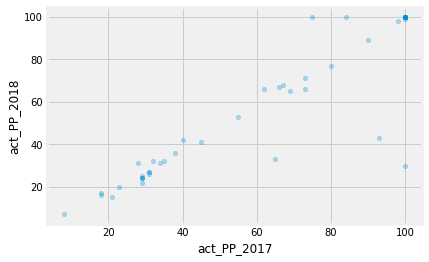

In [43]:
sc.plot(kind='scatter', x='act_PP_2017', y='act_PP_2018', alpha=0.3)

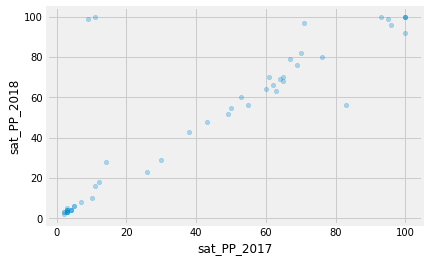

In [44]:
sc.plot(kind='scatter', x='sat_PP_2017', y='sat_PP_2018', alpha=0.3)

In [45]:


xs = [0.5,0.7,0.3,0.2]     # values (must be floats!)
mean = sum(xs) / len(xs)   # mean
var  = sum(pow(x-mean,2) for x in xs) / len(xs)  # variance
std  = math.sqrt(var)  # standard deviation
print(std)

0.19202864369671518


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [46]:
def stddev1(ds):
    #mean = sum(ds) / len(ds)   # mean
    std  = math.sqrt((sum(pow((x-(sum(ds) / len(ds) )),2) for x in ds)) / len(ds))  # Standard Deviation
    #var  = (sum(pow((x-(sum(ds) / len(ds) )),2) for x in ds)) / len(ds)  # variance
    #std  = math.sqrt(var)  # standard deviation
    return std;
 

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [47]:
dict_for_std = {}
for n in sc.columns:
    if n != 'State':
        dict_for_std[n] = stddev1(sc[n])

print(dict_for_std)

{'act_PP_2017': 31.824175751231806, 'act_Composite_2017': 2.000786081581989, 'act_PP_2018': 33.745194881997506, 'act_Composite_2018': 1.8516885484833543, 'sat_PP_2017': 34.92907076664508, 'sat_Total_2017': 91.58351056778743, 'sat_PP_2018': 36.946619223539415, 'sat_Total_2018': 93.22742384464433}


In [48]:
sc.describe()

,act_PP_2017,act_Composite_2017,act_PP_2018,act_Composite_2018,sat_PP_2017,sat_Total_2017,sat_PP_2018,sat_Total_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,21.519608,61.647059,21.345098,39.803922,1126.098039,45.745098,1120.019608
std,32.140842,2.020695,34.080976,1.870114,35.276632,92.494812,37.314256,94.155083
min,8.000000,17.800000,7.000000,17.900000,2.000000,950.000000,2.000000,977.000000
25%,31.000000,19.800000,28.500000,19.850000,4.000000,1055.500000,4.500000,1057.500000
50%,69.000000,21.400000,66.000000,21.100000,38.000000,1107.000000,52.000000,1098.000000
75%,100.000000,23.600000,100.000000,23.050000,66.000000,1212.000000,77.500000,1204.000000
max,100.000000,25.500000,100.000000,24.900000,100.000000,1295.000000,100.000000,1298.000000


In [49]:
sc['act_PP_2017'].std()

32.14084201588683

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: No.There were some difference

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [50]:
#code

Text(0.5, 1.0, '2017 Participation rate PDF Comparison between SAT and ACT')

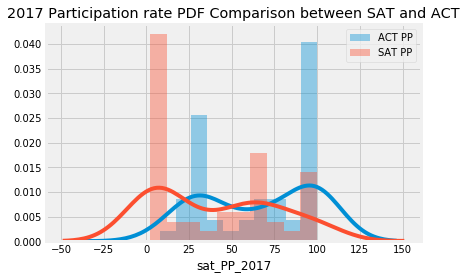

In [51]:


sns.distplot(sc['act_PP_2017'], bins=10, kde = True,label="ACT PP");
sns.distplot(sc['sat_PP_2017'], bins=10, kde = True,label="SAT PP");
plt.legend()
plt.title("2017 Participation rate PDF Comparison between SAT and ACT")
#plt.axis('off')

Text(0.5, 1.0, '2018 Participation rate PDF Comparison between SAT and ACT')

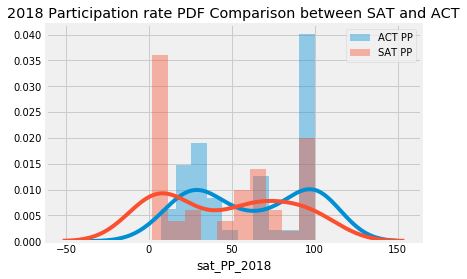

In [52]:
sns.distplot(sc['act_PP_2018'], bins=10, kde = True,label="ACT PP");
sns.distplot(sc['sat_PP_2018'], bins=10, kde = True,label="SAT PP");

plt.legend()
plt.title("2018 Participation rate PDF Comparison between SAT and ACT")
#plt.axis('off')

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

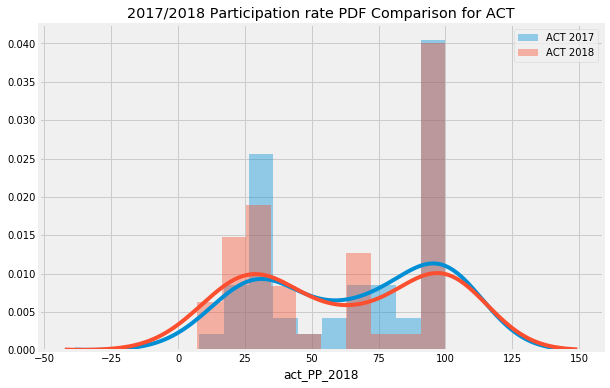

In [53]:
plt.figure(figsize=(9,6))
sns.distplot(sc['act_PP_2017'], bins=10, kde = True,label="ACT 2017");
sns.distplot(sc['act_PP_2018'], bins=10, kde = True,label="ACT 2018");
plt.legend()
plt.title("2017/2018 Participation rate PDF Comparison for ACT")
#plt.axis('off')
plt.style.use('fivethirtyeight')

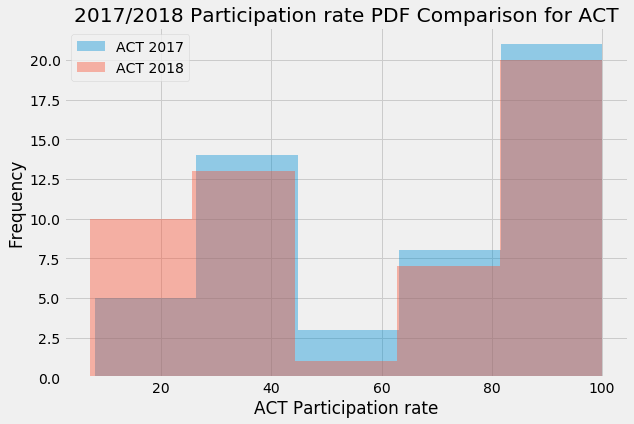

In [54]:
plt.figure(figsize=(9,6))
sns.distplot(sc['act_PP_2017'], bins=5, kde = False,label="ACT 2017");
sns.distplot(sc['act_PP_2018'], bins=5, kde = False,label="ACT 2018");
plt.legend()
plt.xlabel('ACT Participation rate')
plt.ylabel('Frequency')
plt.title("2017/2018 Participation rate PDF Comparison for ACT")
#plt.axis('off')
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, '2017/2018 Participation rate PDF Comparison for SAT')

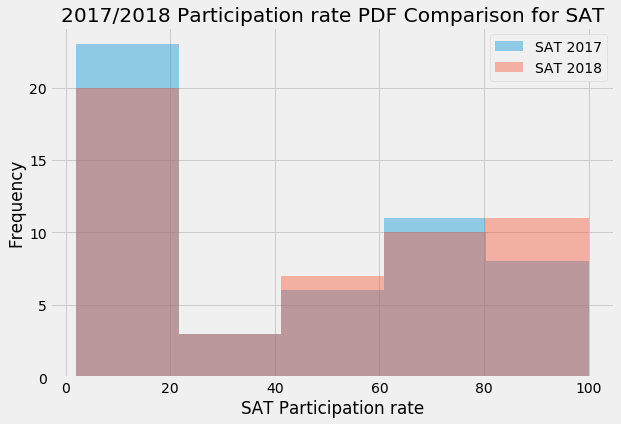

In [55]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.distplot(sc['sat_PP_2017'], bins=5, kde = False,label="SAT 2017");
sns.distplot(sc['sat_PP_2018'], bins=5, kde = False,label="SAT 2018");
plt.legend()
plt.xlabel('SAT Participation rate')
plt.ylabel('Frequency')
plt.title("2017/2018 Participation rate PDF Comparison for SAT")
#plt.axis('off')

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).


It appears that there is a strong anti-correlation between Participation rates and Exam Scores.

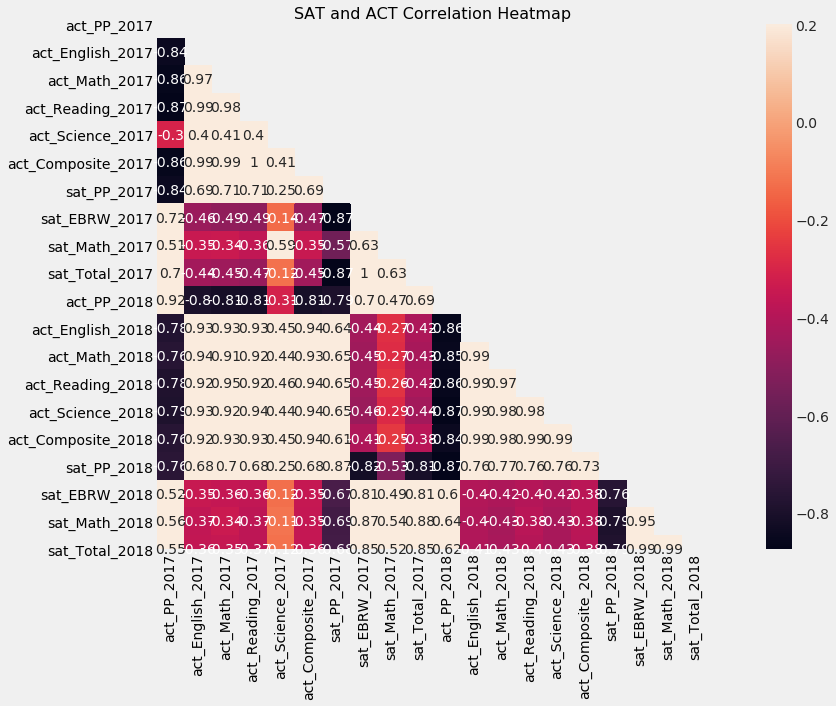

In [56]:
plt.figure(figsize = (18,9))
plt.title('SAT and ACT Correlation Heatmap', fontsize = 16);

# Mask to remove redundancy from the heatmap.
mask = np.zeros_like(score.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(score.corr(), mask=mask, vmax=.2, square=True, annot = True);
#plt.savefig('./images/sat_act_heatmap.png')

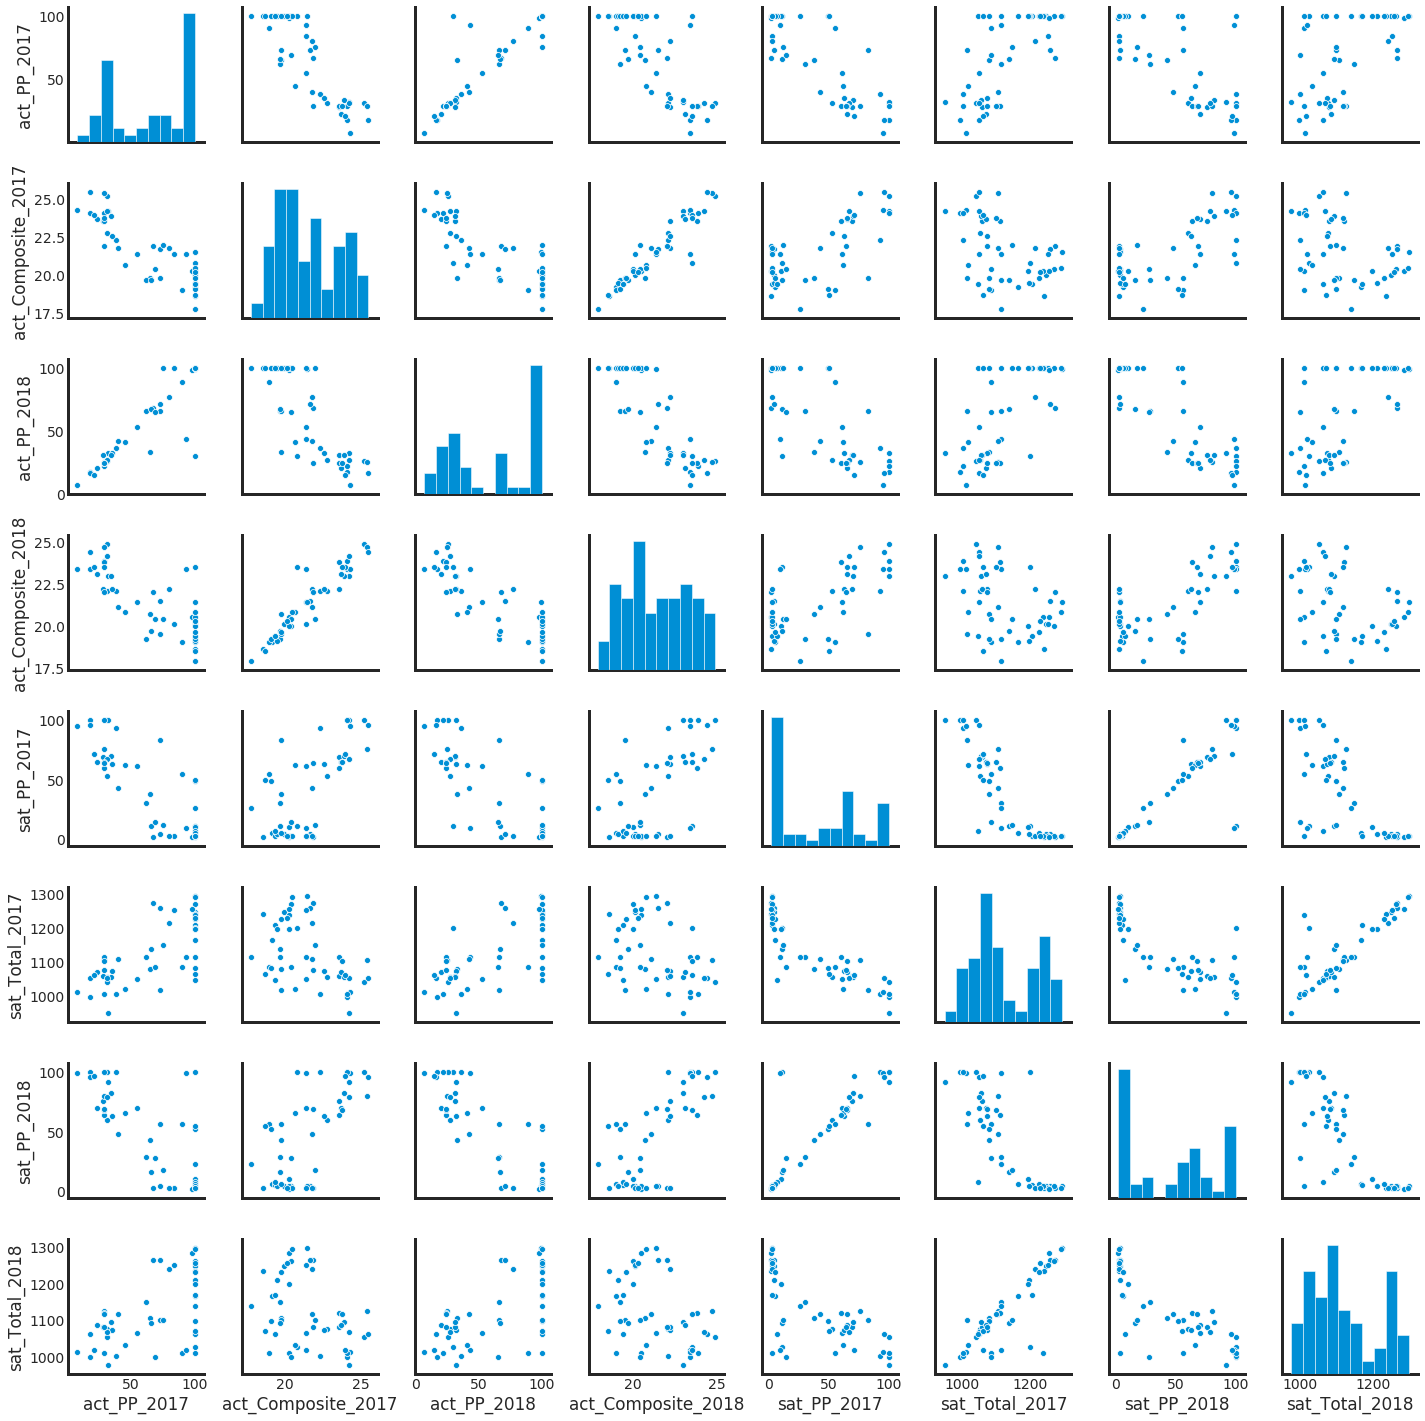

In [57]:

with sns.axes_style("white"):
    #plt.figure(figsize = (18,9))
    #plt.title('SAT and ACT Correlation PairPlot', fontsize = 16)
    sns.pairplot(sc.iloc[:,1:])
plt.savefig('./sat_act_pairplot.png')


In [58]:
sc.columns

Index(['State', 'act_PP_2017', 'act_Composite_2017', 'act_PP_2018',
       'act_Composite_2018', 'sat_PP_2017', 'sat_Total_2017', 'sat_PP_2018',
       'sat_Total_2018'],
      dtype='object')

In [59]:
sc.describe()

,act_PP_2017,act_Composite_2017,act_PP_2018,act_Composite_2018,sat_PP_2017,sat_Total_2017,sat_PP_2018,sat_Total_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,21.519608,61.647059,21.345098,39.803922,1126.098039,45.745098,1120.019608
std,32.140842,2.020695,34.080976,1.870114,35.276632,92.494812,37.314256,94.155083
min,8.000000,17.800000,7.000000,17.900000,2.000000,950.000000,2.000000,977.000000
25%,31.000000,19.800000,28.500000,19.850000,4.000000,1055.500000,4.500000,1057.500000
50%,69.000000,21.400000,66.000000,21.100000,38.000000,1107.000000,52.000000,1098.000000
75%,100.000000,23.600000,100.000000,23.050000,66.000000,1212.000000,77.500000,1204.000000
max,100.000000,25.500000,100.000000,24.900000,100.000000,1295.000000,100.000000,1298.000000


In [60]:
sc_desc = sc.describe().reset_index()

In [61]:
sc_desc.head(10)

,index,act_PP_2017,act_Composite_2017,act_PP_2018,act_Composite_2018,sat_PP_2017,sat_Total_2017,sat_PP_2018,sat_Total_2018
0,count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
1,mean,65.254902,21.519608,61.647059,21.345098,39.803922,1126.098039,45.745098,1120.019608
2,std,32.140842,2.020695,34.080976,1.870114,35.276632,92.494812,37.314256,94.155083
3,min,8.000000,17.800000,7.000000,17.900000,2.000000,950.000000,2.000000,977.000000
4,25%,31.000000,19.800000,28.500000,19.850000,4.000000,1055.500000,4.500000,1057.500000
5,50%,69.000000,21.400000,66.000000,21.100000,38.000000,1107.000000,52.000000,1098.000000
6,75%,100.000000,23.600000,100.000000,23.050000,66.000000,1212.000000,77.500000,1204.000000
7,max,100.000000,25.500000,100.000000,24.900000,100.000000,1295.000000,100.000000,1298.000000


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [62]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
   # plt.figure(figsize = (18,20))
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    plt.tight_layout()
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        
        ax[i].hist(dataframe[column]) # feel free to add more settings
       # print(list_of_titles[i])
        ax[i].set_title(list_of_titles[i])
       # ax[i].set_xlabel(list_of_xlabels[i])
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

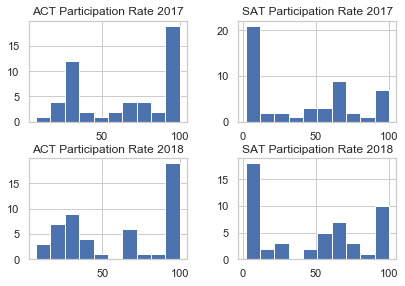

In [93]:
subplot_histograms(sc,['act_PP_2017','sat_PP_2017','act_PP_2018','sat_PP_2018'],
                   ['ACT Participation Rate 2017','SAT Participation Rate 2017','ACT Participation Rate 2018','SAT Participation Rate 2018'],
                   ['ACT Participation Rate','SAT Participation Rate','ACT Participation Rate','SAT Participation Rate'])

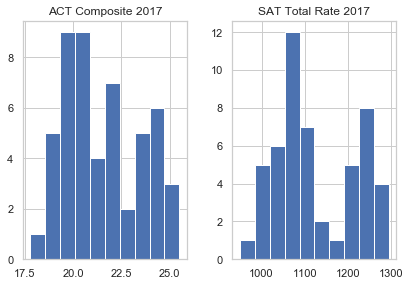

In [94]:
subplot_histograms(sc,['act_Composite_2017','sat_Total_2017'],
                   ['ACT Composite 2017','SAT Total Rate 2017'],
                   ['ACT Participation Rate','SAT Participation Rate'])

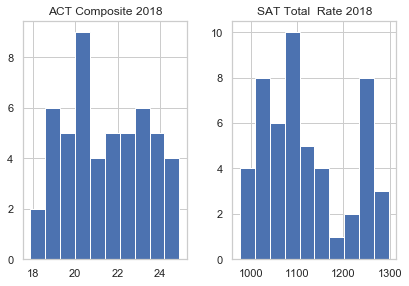

In [95]:
subplot_histograms(sc,['act_Composite_2018','sat_Total_2018'],
                   ['ACT Composite 2018','SAT Total  Rate 2018'],
                   ['ACT Participation Rate','SAT Participation Rate'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0, 0.5, 'ACT Participation Rate')

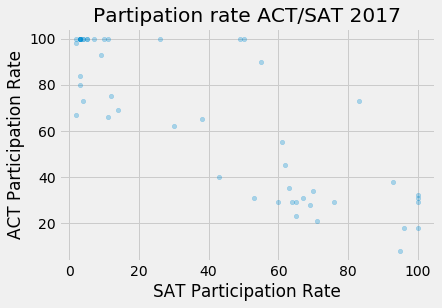

In [66]:
sc.plot(kind='scatter', x='sat_PP_2017', y='act_PP_2017', alpha=0.3)
plt.title('Partipation rate ACT/SAT 2017')
plt.xlabel('SAT Participation Rate')
plt.ylabel('ACT Participation Rate')

Text(0, 0.5, 'ACT Participation Rate')

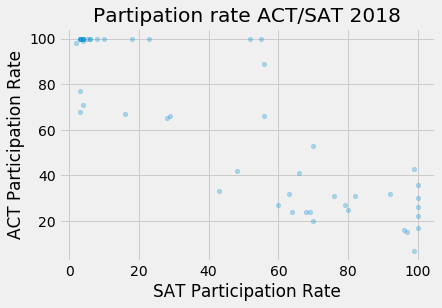

In [67]:
sc.plot(kind='scatter', x='sat_PP_2018', y='act_PP_2018', alpha=0.3)
plt.title('Partipation rate ACT/SAT 2018')
plt.xlabel('SAT Participation Rate')
plt.ylabel('ACT Participation Rate')

Text(0, 0.5, 'ACT Math Rate')

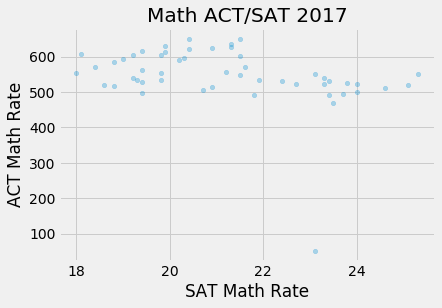

In [68]:
score.plot(kind='scatter', x='act_Math_2017', y='sat_Math_2017', alpha=0.3)
plt.title('Math ACT/SAT 2017')
plt.xlabel('SAT Math Rate')
plt.ylabel('ACT Math Rate')

Text(0, 0.5, 'ACT Math Rate')

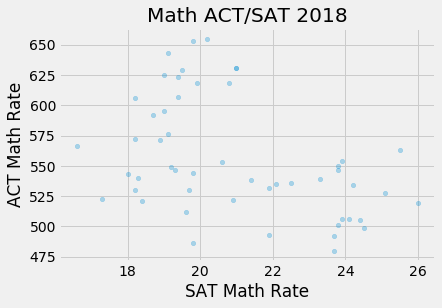

In [69]:
score.plot(kind='scatter', x='act_Math_2018', y='sat_Math_2018', alpha=0.3)
plt.title('Math ACT/SAT 2018')
plt.xlabel('SAT Math Rate')
plt.ylabel('ACT Math Rate')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

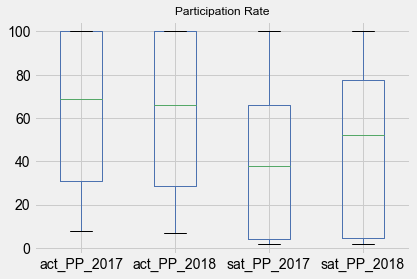

In [70]:
fig1, ax = plt.subplots()
sns.set(style="whitegrid")
ax.set_title('Participation Rate')
sc.loc[:,['act_PP_2017','act_PP_2018','sat_PP_2017','sat_PP_2018']].boxplot(vert=True)

In [71]:
#fig1, ax = plt.subplots()
#sns.set(style="whitegrid")
ax.set_title('Boxplot Scores for ACT 2017/2018')
bx=score.loc[:,['act_Math_2017','act_Math_2018','act_English_2017','act_English_2018','act_Reading_2017','act_Reading_2018','act_Composite_2017','act_Composite_2018']]

Text(0.5, 1.0, 'Participation Rate')

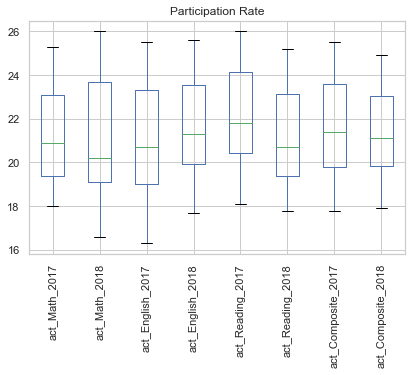

In [72]:
bx.loc[:,:].boxplot(vert=True)
locs,labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('Participation Rate')

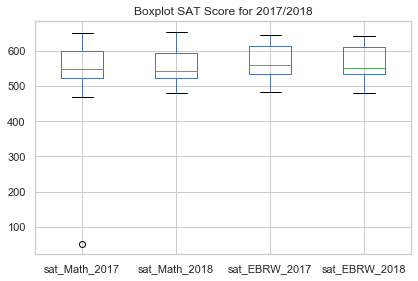

In [73]:
fig1, ax = plt.subplots()
sns.set(style="whitegrid")
ax.set_title('Boxplot SAT Score for 2017/2018')
score.loc[:,['sat_Math_2017','sat_Math_2018','sat_EBRW_2017','sat_EBRW_2018']].boxplot(vert=True)

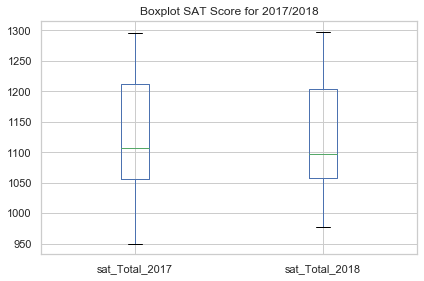

In [74]:
fig1, ax = plt.subplots()
sns.set(style="whitegrid")
ax.set_title('Boxplot SAT Score for 2017/2018')
score.loc[:,['sat_Total_2017','sat_Total_2018']].boxplot(vert=True)

In [75]:
score.columns

Index(['State', 'act_PP_2017', 'act_English_2017', 'act_Math_2017',
       'act_Reading_2017', 'act_Science_2017', 'act_Composite_2017',
       'sat_PP_2017', 'sat_EBRW_2017', 'sat_Math_2017', 'sat_Total_2017',
       'act_PP_2018', 'act_English_2018', 'act_Math_2018', 'act_Reading_2018',
       'act_Science_2018', 'act_Composite_2018', 'sat_PP_2018',
       'sat_EBRW_2018', 'sat_Math_2018', 'sat_Total_2018'],
      dtype='object')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers: All the variables has normal distribution.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: Yes. The data is normally distributed

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:All the columns are normally distributed

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:no, We dont have enought detailed data to have sampling and get the statistical inferences

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No, Its not appropriate. Because the sclaes of the score is different. SAT is outr of 36 , whereas ACT is out of 800.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Null Hypothesis / Alternate Hypothesis:
    
    NUll Hypothesis : ACT mostly than SAT
    Alternate HYpothesis : SAT claims mostly widely used for college admissions. 

P_Value can be calculated based on the mean & Standard Deviation of the participation rate of SAT versus ACT. 
The P_Value = 0.02 , which means the alternate hypothesis is true. 

Note : Though the observation here is based on the average means of the state.



In [76]:
import scipy.stats as stats
import numpy as np
stats.ttest_ind_from_stats(45.745098,37.314256,51,61.647059,34.080976,51,equal_var=True)

Ttest_indResult(statistic=-2.247173815129927, pvalue=0.026826305021753708)

In [77]:
sc.describe()

,act_PP_2017,act_Composite_2017,act_PP_2018,act_Composite_2018,sat_PP_2017,sat_Total_2017,sat_PP_2018,sat_Total_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,21.519608,61.647059,21.345098,39.803922,1126.098039,45.745098,1120.019608
std,32.140842,2.020695,34.080976,1.870114,35.276632,92.494812,37.314256,94.155083
min,8.000000,17.800000,7.000000,17.900000,2.000000,950.000000,2.000000,977.000000
25%,31.000000,19.800000,28.500000,19.850000,4.000000,1055.500000,4.500000,1057.500000
50%,69.000000,21.400000,66.000000,21.100000,38.000000,1107.000000,52.000000,1098.000000
75%,100.000000,23.600000,100.000000,23.050000,66.000000,1212.000000,77.500000,1204.000000
max,100.000000,25.500000,100.000000,24.900000,100.000000,1295.000000,100.000000,1298.000000


## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [78]:
sc.loc[((sc['act_PP_2017'] + sc['sat_PP_2017']) < 80),:]

,State,act_PP_2017,act_Composite_2017,act_PP_2018,act_Composite_2018,sat_PP_2017,sat_Total_2017,sat_PP_2018,sat_Total_2018
15,Iowa,67.0,21.9,68.0,22.0,2.0,1275,3.0,1265
16,Kansas,73.0,21.7,71.0,21.5,4.0,1260,4.0,1265
31,New Mexico,66.0,19.7,67.0,19.7,11.0,1138,16.0,1093


In [79]:
sc.loc[((sc['act_PP_2018'] + sc['sat_PP_2018']) < 80),:]

,State,act_PP_2017,act_Composite_2017,act_PP_2018,act_Composite_2018,sat_PP_2017,sat_Total_2017,sat_PP_2018,sat_Total_2018
1,Alaska,65.0,19.8,33.0,20.7,38.0,1080,43.0,1106
15,Iowa,67.0,21.9,68.0,22.0,2.0,1275,3.0,1265
16,Kansas,73.0,21.7,71.0,21.5,4.0,1260,4.0,1265


In [80]:
sc.loc[(sc['act_PP_2017']>80) & (sc['act_PP_2018'] < 50), :].head()

,State,act_PP_2017,act_Composite_2017,act_PP_2018,act_Composite_2018,sat_PP_2017,sat_Total_2017,sat_PP_2018,sat_Total_2018
5,Colorado,100.0,20.8,30.0,23.5,11.0,1201,100.0,1025
13,Illinois,93.0,21.4,43.0,23.4,9.0,1115,99.0,1019


In [81]:
line1=sc.loc[(sc['sat_PP_2017'] < 20) & (sc['sat_PP_2018'] > 50), ['State','sat_PP_2017','sat_PP_2018']]

In [82]:
df2 = pd.melt(line1, id_vars=["State"], 
                  var_name="sat_PP_2017", value_name="Value")

In [83]:
df2 = pd.melt(line1, id_vars=["State"], 
                  var_name="sat_PP_2018", value_name="Value")

In [84]:
df2.rename(columns={"sat_PP_2018": "year"},inplace=True)

In [85]:
df2

,State,year,Value
0,Colorado,sat_PP_2017,11.0
1,Illinois,sat_PP_2017,9.0
2,Colorado,sat_PP_2018,100.0
3,Illinois,sat_PP_2018,99.0


In [86]:
df2['year'] = df2['year'].map({'sat_PP_2017': '2017', 'sat_PP_2018': '2018'})

Text(0.5, 1.0, ' Participation Rate in SAT increased drastically')

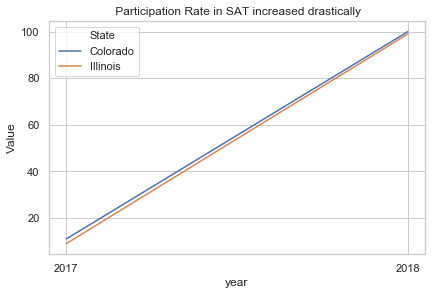

In [87]:
ax = sns.lineplot(x="year", y="Value", hue="State",
                    data=df2)
ax.set_title(' Participation Rate in SAT increased drastically')

In [88]:
df3 = pd.melt(sc, id_vars=["State"], 
                  var_name="sat_PP_2018", value_name="Value")
df3 = pd.melt(sc, id_vars=["State"], 
                  var_name="act_PP_2018", value_name="Value")
df3.rename(columns={"act_PP_2018": "year","Value":"Participation Percentage"},inplace=True)
df3['Exam'] = df3['year'].map({'act_PP_2018': 'ACT', 'sat_PP_2018': 'SAT'})

In [89]:
df3.rename(columns={"act_PP_2018": "year"},inplace=True)


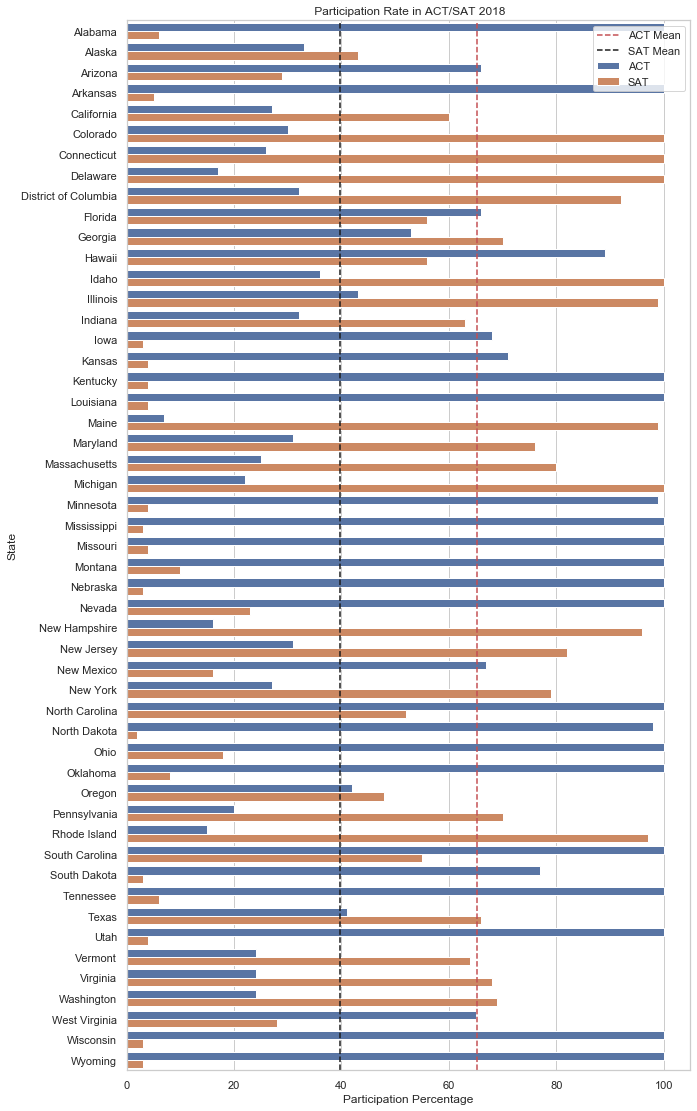

In [90]:
plt.figure(figsize = (9,18))
ax = sns.barplot(x="Participation Percentage", y="State", hue="Exam",
                    data=df3)

plt.axvline(x=sc['act_PP_2017'].mean(), color='r', linestyle='--',label ='ACT Mean')
plt.axvline(x=sc['sat_PP_2017'].mean(), color='k', linestyle='--',label ='SAT Mean')
ax.set_title(' Participation Rate in ACT/SAT 2018')
plt.legend()

In [91]:
df4= df3.loc[(df3['State'].isin(['Iowa','Alaska','New Mexico','Alabama','Colorado'])),:]

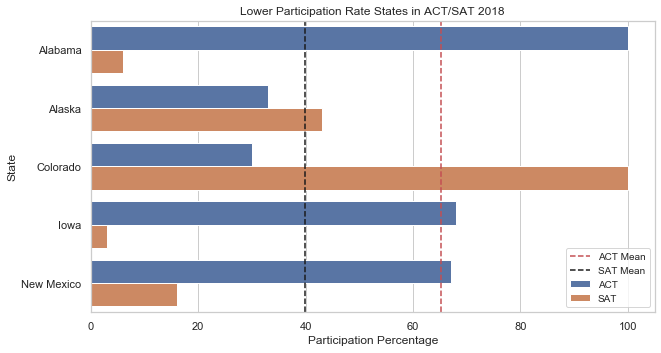

In [92]:

plt.figure(figsize = (9,5))
ax = sns.barplot(x="Participation Percentage", y="State", hue="Exam",
                    data=df4)

plt.axvline(x=sc['act_PP_2017'].mean(), color='r', linestyle='--',label ='ACT Mean')
plt.axvline(x=sc['sat_PP_2017'].mean(), color='k', linestyle='--',label ='SAT Mean')
ax.set_title('Lower Participation Rate States in ACT/SAT 2018')
plt.legend(loc=4, fontsize=10)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Through the course of this project, executed and
documented the process of cleaning and organizing
data in our Python Pandas DataFrames, and plotting
data to extract meaningful insights.
Data is displayed both in queried tabular form as well as
in Histograms, Scatter Plots, and Box Plots from
Python's Seaborn/Matplotlib visualization libraries.
Through these displays, we identified a strong growth
opportunity for the College Board in the states of lowa ,
Alaska, New Mexico , where the overall participation
rate in the SAT/ACT exams are lesser than 80%

The SAT board can be recommended for the states
lowa, Alaska, New Mexico which has lower participation
rate. 